In [1]:
import pandas as pd

In [2]:
#load the dataset
df =pd.read_csv('loan_default_prediction_project.csv')
df.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


In [3]:
df.shape

(1000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


# Preprocessing

## handle missing values

In [5]:
df.isnull().sum()

Age                        0
Gender                   208
Income                     0
Employment_Status         94
Location                   0
Credit_Score               0
Debt_to_Income_Ratio       0
Existing_Loan_Balance      0
Loan_Status                0
Loan_Amount                0
Interest_Rate              0
Loan_Duration_Months       0
dtype: int64

In [6]:
#Check the proportion of missing values
df['Gender'].isnull().sum() / len(df)

0.208

In [7]:
# Fill missing values in 'gender' with the mode (most frequent value)
mode_gender = df['Gender'].mode()[0]  # Calculate the mode
df['Gender'].fillna(mode_gender, inplace=True)

In [8]:
# Verify that there are no more missing values
print("Missing values after:", df['Gender'].isnull().sum())

Missing values after: 0


In [9]:
# Check missing values in 'employment_status'
print("Missing values before:", df['Employment_Status'].isnull().sum())

# Fill missing values with the mode
mode_employment = df['Employment_Status'].mode()[0]
df['Employment_Status'].fillna(mode_employment, inplace=True)

# Verify there are no missing values
print("Missing values after:", df['Employment_Status'].isnull().sum())

Missing values before: 94
Missing values after: 0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      1000 non-null   object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [11]:
df1=df.copy()

## Encoding categorical values

In [12]:
print(df1['Location'].unique())
print(df1['Gender'].unique())
print(df1['Employment_Status'].unique())
print(df1['Loan_Status'].unique())

['Suburban' 'Urban' 'Rural']
['Male' 'Female']
['Employed' 'Unemployed']
['Non-Default' 'Default']


In [13]:
#Apply One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
df1[['Gender']] =pd.DataFrame(ohe.fit_transform(df1[['Gender']]).toarray())
df1.rename(columns={'Gender': 'Gender_male'}, inplace=True)

In [14]:
pd.get_dummies(df[['Gender']]).columns

Index(['Gender_Female', 'Gender_Male'], dtype='object')

In [15]:
#ordinal encoding
location_order=[['Rural','Suburban','Urban']]

from sklearn.preprocessing import OrdinalEncoder

oen = OrdinalEncoder(categories=location_order)
df1['Location'] = oen.fit_transform(df1[['Location']])

In [16]:
# encoding using map function
ord_data={'Employed':1,'Unemployed':0}
ord_data1={'Non-Default':0 ,'Default':1}

df1['Employment_Status']=df1['Employment_Status'].map(ord_data)
df1['Loan_Status']=df1['Loan_Status'].map(ord_data1)
df1.rename(columns={'Employment_Status': 'Employed','Loan_Status':'Loan_default'}, inplace=True)


In [17]:
df1.head(5)

,Age,Gender_male,Income,Employed,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_default,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1.0,71266.105175,1,1.0,639,0.007142,27060.188289,0,13068.330587,18.185533,59
1,46,0.0,37283.054601,1,1.0,474,0.456731,40192.994312,1,15159.338369,11.727471,69
2,32,1.0,69567.036392,1,2.0,750,0.329231,25444.262759,1,6131.287659,17.030462,69
3,60,0.0,72016.087392,1,0.0,435,0.052482,3122.213749,0,37531.880251,16.868949,26
4,25,0.0,32161.988250,0,1.0,315,0.450236,19197.350445,0,41466.397989,18.891582,66


In [18]:
df.head(5)

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,Female,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender_male            1000 non-null   float64
 2   Income                 1000 non-null   float64
 3   Employed               1000 non-null   int64  
 4   Location               1000 non-null   float64
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_default           1000 non-null   int64  
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 93.9 KB


## Outlier detection and removing

In [20]:
df1.describe()

,Age,Gender_male,Income,Employed,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_default,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,0.393000,60705.291386,0.690000,0.960000,571.094000,0.485502,25239.656186,0.195000,27636.369345,11.538267,42.221000
std,13.497852,0.488661,24594.030383,0.462725,0.809355,163.395983,0.296466,14202.689890,0.396399,12925.200961,4.883342,17.116867
min,18.000000,0.000000,20010.775440,0.000000,0.000000,250.000000,0.000628,80.059377,0.000000,5060.998602,3.003148,12.000000
25%,29.000000,0.000000,40820.367273,0.000000,0.000000,429.000000,0.220606,13597.494593,0.000000,16756.405848,7.483547,27.000000
50%,42.000000,0.000000,60547.119929,1.000000,1.000000,567.000000,0.483633,25439.429898,0.000000,27938.066858,11.537942,42.000000
75%,52.000000,1.000000,80338.552791,1.000000,2.000000,720.250000,0.735476,37305.466739,0.000000,39151.564233,15.499129,57.000000
max,64.000000,1.000000,150000.000000,1.000000,2.000000,849.000000,0.999849,49987.578171,1.000000,49986.843702,19.991438,71.000000


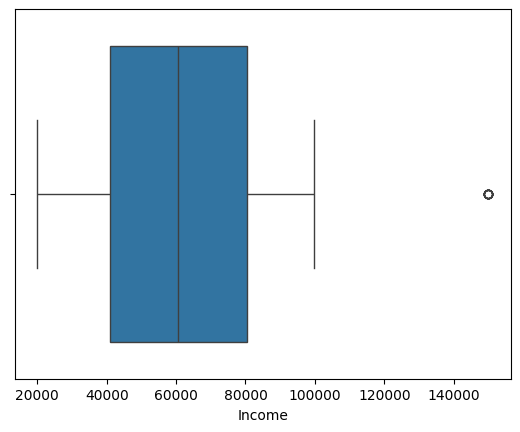

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Income',data=df1)
plt.show()

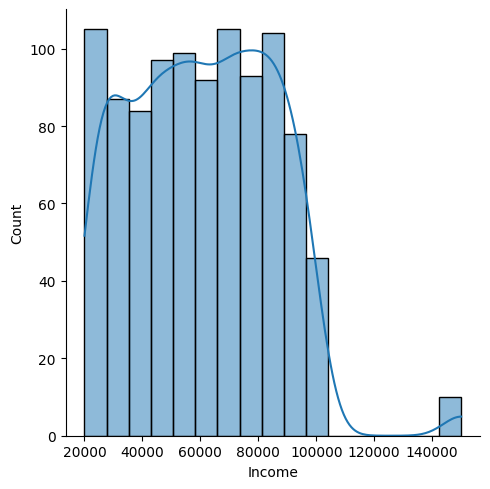

In [22]:
sns.displot(df1['Income'],kde = True)
plt.show()

In [23]:
#removing outliers using IQR method
Q1 = df1['Income'].quantile(0.25)
Q3 = df1['Income'].quantile(0.75)
IQR = Q3-Q1

min = Q1 -(1.5*IQR)
max = Q3+(1.5*IQR)

In [24]:
min,max

(-18456.91100309589, 139615.8310670297)

In [25]:
df1=df1[df1['Income']<max]

In [26]:
df1.reset_index(drop=True,inplace=True)

In [27]:
df1

,Age,Gender_male,Income,Employed,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_default,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1.0,71266.105175,1,1.0,639,0.007142,27060.188289,0,13068.330587,18.185533,59
1,46,0.0,37283.054601,1,1.0,474,0.456731,40192.994312,1,15159.338369,11.727471,69
2,32,1.0,69567.036392,1,2.0,750,0.329231,25444.262759,1,6131.287659,17.030462,69
3,60,0.0,72016.087392,1,0.0,435,0.052482,3122.213749,0,37531.880251,16.868949,26
4,25,0.0,32161.988250,0,1.0,315,0.450236,19197.350445,0,41466.397989,18.891582,66
...,...,...,...,...,...,...,...,...,...,...,...,...
985,22,0.0,98081.105862,0,2.0,727,0.961613,3586.586891,0,41473.241896,3.700707,23
986,40,1.0,30044.017181,1,0.0,416,0.775082,32993.493341,1,48942.588814,12.932559,62
987,27,0.0,21355.813191,0,0.0,806,0.621937,21579.216456,1,34010.252873,3.825633,55
988,61,0.0,81612.656941,1,0.0,845,0.606793,38180.153354,1,17504.010506,13.263354,27


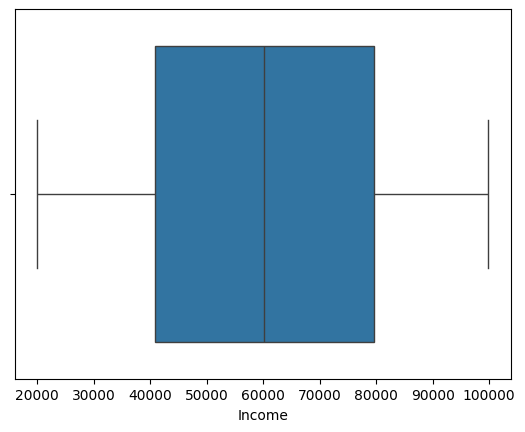

In [28]:
sns.boxplot(x='Income',data=df1)
plt.show()

In [29]:
df1.describe()

,Age,Gender_male,Income,Employed,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_default,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,40.942424,0.392929,59803.324632,0.689899,0.962626,570.347475,0.486263,25262.842723,0.192929,27719.288920,11.541352,42.267677
std,13.474828,0.488648,23011.857973,0.462769,0.809210,163.331687,0.296501,14192.889085,0.394797,12941.180203,4.891344,17.135694
min,18.000000,0.000000,20010.775440,0.000000,0.000000,250.000000,0.000628,80.059377,0.000000,5060.998602,3.003148,12.000000
25%,29.000000,0.000000,40756.358014,0.000000,0.000000,429.000000,0.220792,13708.266349,0.000000,16810.203190,7.475972,27.000000
50%,42.000000,0.000000,60148.328754,1.000000,1.000000,566.000000,0.487117,25490.619136,0.000000,28045.155728,11.537942,42.000000
75%,52.000000,1.000000,79615.905287,1.000000,2.000000,719.000000,0.736376,37280.533590,0.000000,39184.167774,15.532023,57.000000
max,64.000000,1.000000,99867.800911,1.000000,2.000000,849.000000,0.999849,49987.578171,1.000000,49986.843702,19.991438,71.000000


In [30]:
df2=df1.copy()

## Feature Scaling

In [31]:
#features with high numerical values
scaling_data=df1[['Income','Existing_Loan_Balance','Loan_Amount']]

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[['Income','Existing_Loan_Balance','Loan_Amount']] = pd.DataFrame(scaler.fit_transform(scaling_data),columns=['Income','Existing_Loan_Balance','Loan_Amount'])

In [33]:
df2.head()

,Age,Gender_male,Income,Employed,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_default,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1.0,0.641839,1,1.0,639,0.007142,0.540602,0,0.178234,18.185533,59
1,46,0.0,0.216290,1,1.0,474,0.456731,0.803745,1,0.224778,11.727471,69
2,32,1.0,0.620562,1,2.0,750,0.329231,0.508224,1,0.023823,17.030462,69
3,60,0.0,0.651230,1,0.0,435,0.052482,0.060956,0,0.722766,16.868949,26
4,25,0.0,0.152162,0,1.0,315,0.450236,0.383054,0,0.810344,18.891582,66


# Model Development

## Feature Selection

In [34]:
df3=df2.copy()

In [35]:
df3.drop(columns=['Interest_Rate','Loan_Duration_Months','Loan_Amount'],inplace=True)

In [36]:
df3.head()

,Age,Gender_male,Income,Employed,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_default
0,56,1.0,0.641839,1,1.0,639,0.007142,0.540602,0
1,46,0.0,0.216290,1,1.0,474,0.456731,0.803745,1
2,32,1.0,0.620562,1,2.0,750,0.329231,0.508224,1
3,60,0.0,0.651230,1,0.0,435,0.052482,0.060956,0
4,25,0.0,0.152162,0,1.0,315,0.450236,0.383054,0


In [37]:
df3.to_csv('cleaned_data.csv',index=False)

## Model Training

In [38]:
# split into input and output
x=df3.drop(columns='Loan_default')
y=df3['Loan_default']

### Handling Imbalance Data

In [39]:
#SMOTE
# Combine Over- and Under-sampling
#Use a mix of oversampling and undersampling to balance the dataset without excessively increasing or reducing the dataset size

In [40]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x, y)


In [41]:
y_resampled.value_counts()

Loan_default
1    449
0    331
Name: count, dtype: int64

In [42]:
#split into training and testing data

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

x_train,x_test,y_train,y_test = train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=32)

### Random forest classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
rf_model.score(x_test,y_test)

0.9230769230769231

In [45]:
rf_model.score(x_train,y_train)

1.0

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

In [47]:
y_pred = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]  # Probability of the positive class

In [48]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-Score
f1 = f1_score(y_test, y_pred)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.89
Recall: 0.98
F1-Score: 0.93
ROC-AUC: 0.98


Confusion Matrix:
 [[64 10]
 [ 2 80]]


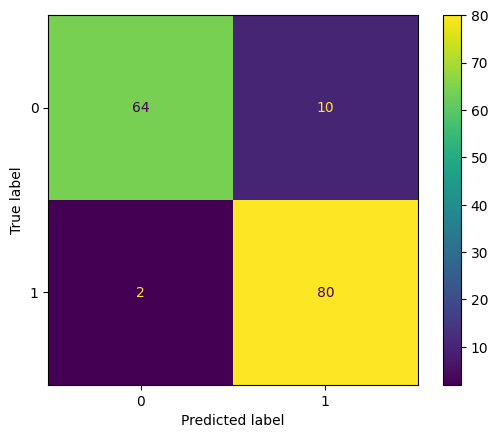

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis") 

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [51]:
lr.score(x_test,y_test)

0.6730769230769231

In [52]:
y_pred1 = lr.predict(x_test)
y_pred_proba1 = lr.predict_proba(x_test)[:, 1]  # Probability of the positive class


Confusion Matrix:
 [[38 36]
 [15 67]]


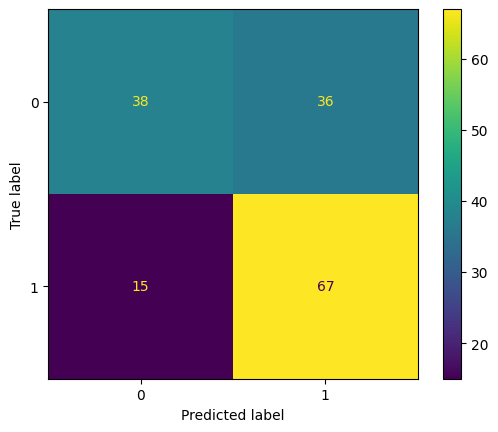

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis") 

In [54]:
# Accuracy
accuracy1 = accuracy_score(y_test, y_pred1)

# Precision
precision1 = precision_score(y_test, y_pred1)

# Recall
recall1 = recall_score(y_test, y_pred1)

# F1-Score
f11 = f1_score(y_test, y_pred1)

# ROC-AUC
roc_auc1 = roc_auc_score(y_test, y_pred_proba1)

# Print Metrics
print(f"Accuracy: {accuracy1:.2f}")
print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")
print(f"F1-Score: {f11:.2f}")
print(f"ROC-AUC: {roc_auc1:.2f}")

Accuracy: 0.67
Precision: 0.65
Recall: 0.82
F1-Score: 0.72
ROC-AUC: 0.70


In [55]:
# as we can see that we got higher accuracy with the random forest classifier, so we will select it as our model.

## Save the trained model

In [56]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'loan_default_model.pkl')
print("Model saved as 'loan_default_model.pkl'")


Model saved as 'loan_default_model.pkl'
